In [1]:
# Define paths to the dataset
train_dir = '/kaggle/input/pepsico-lab-potato-quality-control/Pepsico RnD Potato Lab Dataset/Train'  # Update with your actual path
test_dir = '/kaggle/input/pepsico-lab-potato-quality-control/Pepsico RnD Potato Lab Dataset/Test' 


In [4]:

import os
print(len(os.listdir('/kaggle/input/pepsico-lab-potato-quality-control/Pepsico RnD Potato Lab Dataset/Train/Defective')))
print(len(os.listdir('/kaggle/input/pepsico-lab-potato-quality-control/Pepsico RnD Potato Lab Dataset/Train/Non-Defective')))
print(len(os.listdir('/kaggle/input/pepsico-lab-potato-quality-control/Pepsico RnD Potato Lab Dataset/Test/Defective')))
print(len(os.listdir('/kaggle/input/pepsico-lab-potato-quality-control/Pepsico RnD Potato Lab Dataset/Test/Not Defective')))


370
401
93
101


In [5]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create ImageDataGenerator for training set
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # Split 20% of the images for validation
)

# Load and prepare training data
train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary',  # 'binary' for binary classification (cats vs. dogs)
    subset='training'  # Specify 'training' for the training set
)

# Create ImageDataGenerator for validation set
validation_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # Note: Using the same validation split as in the training set
)

# Load and prepare validation data
validation_data = validation_datagen.flow_from_directory(
    train_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary',
    subset='validation'  # Specify 'validation' for the validation set
)


Found 616 images belonging to 2 classes.
Found 153 images belonging to 2 classes.


In [6]:

from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,UpSampling2D, Dropout


# create CNN model

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))  # 32 filters
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu')) #feature reduction
model.add(Dense(64,activation='relu'))
model.add(Dense(1,activation='sigmoid'))  #output layer

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
from keras.optimizers import Adam
model.compile(optimizer=Adam(learning_rate=0.001),loss='binary_crossentropy',metrics=['accuracy']) #binary_crossentropy - binary classification


history = model.fit(train_data, epochs=10, validation_data=validation_data)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


20/20 ━━━━━━━━━━━━━━━━━━━━ 61s 2s/step - accuracy: 0.5044 - loss: 1.2006 - val_accuracy: 0.4771 - val_loss: 0.7025
Epoch 2/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 36s 1s/step - accuracy: 0.7583 - loss: 0.5162 - val_accuracy: 0.9477 - val_loss: 0.1220
Epoch 3/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 36s 1s/step - accuracy: 0.9215 - loss: 0.2367 - val_accuracy: 0.9869 - val_loss: 0.0677
Epoch 4/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 38s 1s/step - accuracy: 0.9728 - loss: 0.1056 - val_accuracy: 0.9804 - val_loss: 0.0618
Epoch 5/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 37s 1s/step - accuracy: 0.9866 - loss: 0.0571 - val_accuracy: 0.9804 - val_loss: 0.0516
Epoch 6/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 37s 1s/step - accuracy: 0.9838 - loss: 0.0364 - val_accuracy: 0.9804 - val_loss: 0.0908
Epoch 7/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 35s 1s/step - accuracy: 0.9971 - loss: 0.0216 - val_accuracy: 0.9804 - val_loss: 0.0495
Epoch 8/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 37s 1s/step - accuracy: 0.9860 - loss: 0.0391 - val_accuracy: 0.9869 - val_loss: 0.0396
Epo

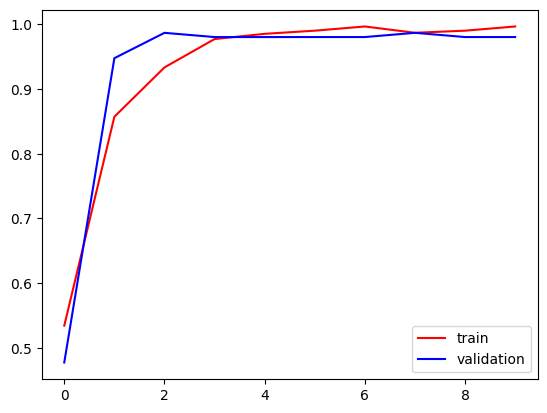

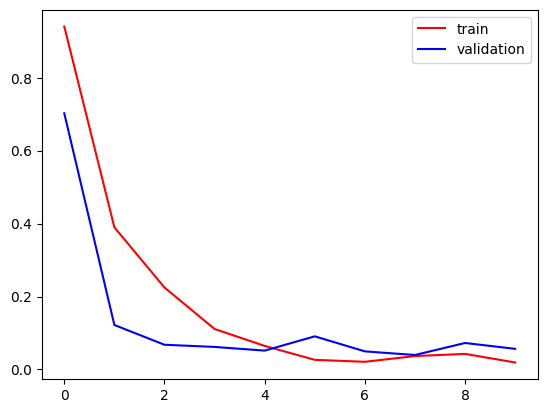

Found 192 images belonging to 2 classes.
6/6 ━━━━━━━━━━━━━━━━━━━━ 11s 2s/step


In [8]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()


plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

test_datagen = ImageDataGenerator(rescale=1./255)
test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary'
)

#predict the test data
predictions = model.predict(test_data)

In [9]:
from sklearn.metrics import confusion_matrix, classification_report

# Assuming you have ground truth labels (true_labels) and predicted labels (predictions)
true_labels = test_data.classes
predicted_labels = (predictions > 0.5).astype(int)  # Adjust the threshold as needed

# Calculate confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Print confusion matrix
print("Confusion Matrix:")
print(cm)

# Print classification report
print("Classification Report:")
print(classification_report(true_labels, predicted_labels))

Confusion Matrix:
[[48 44]
 [43 57]]
Classification Report:
              precision    recall  f1-score   support

           0       0.53      0.52      0.52        92
           1       0.56      0.57      0.57       100

    accuracy                           0.55       192
   macro avg       0.55      0.55      0.55       192
weighted avg       0.55      0.55      0.55       192



In [10]:
# create CNN model

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))  # 32 filters
model.add(BatchNormalization())  # added to reduce overfitting
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())  # added to reduce overfitting
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())  # added to reduce overfitting
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu')) #feature reduction
model.add(Dropout(0.1))  # added to reduce overfitting
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))  # added to reduce overfitting
model.add(Dense(1,activation='sigmoid'))  #output layer


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
from keras.optimizers import Adam
model.compile(optimizer=Adam(learning_rate=0.001),loss='binary_crossentropy',metrics=['accuracy'])
history = model.fit(train_data, epochs=10, validation_data=validation_data)
test_datagen = ImageDataGenerator(rescale=1./255)
test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary'
)
predictions = model.predict(test_data)


Epoch 1/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 45s 1s/step - accuracy: 0.7220 - loss: 7.5182 - val_accuracy: 0.4771 - val_loss: 3.3702
Epoch 2/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 36s 1s/step - accuracy: 0.8891 - loss: 1.6018 - val_accuracy: 0.5229 - val_loss: 1.9042
Epoch 3/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 37s 1s/step - accuracy: 0.9312 - loss: 1.0072 - val_accuracy: 0.5229 - val_loss: 5.1704
Epoch 4/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 36s 1s/step - accuracy: 0.9787 - loss: 0.3176 - val_accuracy: 0.5229 - val_loss: 10.7437
Epoch 5/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 37s 1s/step - accuracy: 0.9372 - loss: 1.0033 - val_accuracy: 0.5229 - val_loss: 9.7527
Epoch 6/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 38s 1s/step - accuracy: 0.9774 - loss: 0.1155 - val_accuracy: 0.5229 - val_loss: 9.8616
Epoch 7/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 37s 1s/step - accuracy: 0.9916 - loss: 0.0560 - val_accuracy: 0.5229 - val_loss: 8.4901
Epoch 8/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 36s 1s/step - accuracy: 0.9879 - loss: 0.1209 - val_accuracy: 0.5229 - val_loss

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


6/6 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step


In [12]:
from sklearn.metrics import confusion_matrix, classification_report

# Assuming you have ground truth labels (true_labels) and predicted labels (predictions)
true_labels = test_data.classes
predicted_labels = (predictions > 0.5).astype(int)  # Adjust the threshold as needed

# Calculate confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Print confusion matrix
print("Confusion Matrix:")
print(cm)

# Print classification report
print("Classification Report after applying techniques to handle overfitting:")
print(classification_report(true_labels, predicted_labels))


Confusion Matrix:
[[ 4 88]
 [ 5 95]]
Classification Report after applying techniques to handle overfitting:
              precision    recall  f1-score   support

           0       0.44      0.04      0.08        92
           1       0.52      0.95      0.67       100

    accuracy                           0.52       192
   macro avg       0.48      0.50      0.38       192
weighted avg       0.48      0.52      0.39       192



In [13]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten

resnet_model = Sequential()    #ResNet50 is a pre-trained model
pretrained_model = tf.keras.applications.ResNet50(include_top = False, #because i have my own image of a diff dimension
                                                input_shape = (256,256,3),
                                                pooling = 'max', classes = 2,
                                                weights = 'imagenet')
for layer in pretrained_model.layers:
    layer.trainable = False  #all layers in the Resnet50 is not trainable; keep those weights; I am going to add my own i/p and other layers

resnet_model.add(pretrained_model)
resnet_model.add(Flatten())
resnet_model.add(Dense(512, activation = 'relu'))
resnet_model.add(Dense(1, activation = 'sigmoid'))



94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [14]:
from keras.optimizers import Adam
resnet_model.compile(optimizer=Adam(learning_rate=0.001),loss='binary_crossentropy',metrics=['accuracy'])

history = resnet_model.fit(train_data, epochs=10, validation_data=validation_data)
predictions = resnet_model.predict(test_data)


from sklearn.metrics import confusion_matrix, classification_report

# Assuming you have ground truth labels (true_labels) and predicted labels (predictions)
true_labels = test_data.classes
predicted_labels = (predictions > 0.5).astype(int)  # Adjust the threshold as needed

# Calculate confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Print confusion matrix
print("Confusion Matrix:")
print(cm)

# Print classification report
print("Classification Report after applying techniques to handle overfitting:")
print(classification_report(true_labels, predicted_labels))

Epoch 1/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 56s 2s/step - accuracy: 0.5093 - loss: 3.6752 - val_accuracy: 0.8824 - val_loss: 0.5743
Epoch 2/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 37s 1s/step - accuracy: 0.6389 - loss: 0.9280 - val_accuracy: 0.8497 - val_loss: 0.5025
Epoch 3/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 36s 1s/step - accuracy: 0.8308 - loss: 0.4771 - val_accuracy: 0.8693 - val_loss: 0.4499
Epoch 4/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 37s 1s/step - accuracy: 0.7802 - loss: 0.4630 - val_accuracy: 0.7712 - val_loss: 0.4718
Epoch 5/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 37s 1s/step - accuracy: 0.8015 - loss: 0.4388 - val_accuracy: 0.8105 - val_loss: 0.3960
Epoch 6/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 37s 1s/step - accuracy: 0.8454 - loss: 0.3721 - val_accuracy: 0.9085 - val_loss: 0.3516
Epoch 7/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 37s 1s/step - accuracy: 0.8758 - loss: 0.3538 - val_accuracy: 0.9281 - val_loss: 0.3285
Epoch 8/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 36s 1s/step - accuracy: 0.8831 - loss: 0.3331 - val_accuracy: 0.7778 - val_loss:

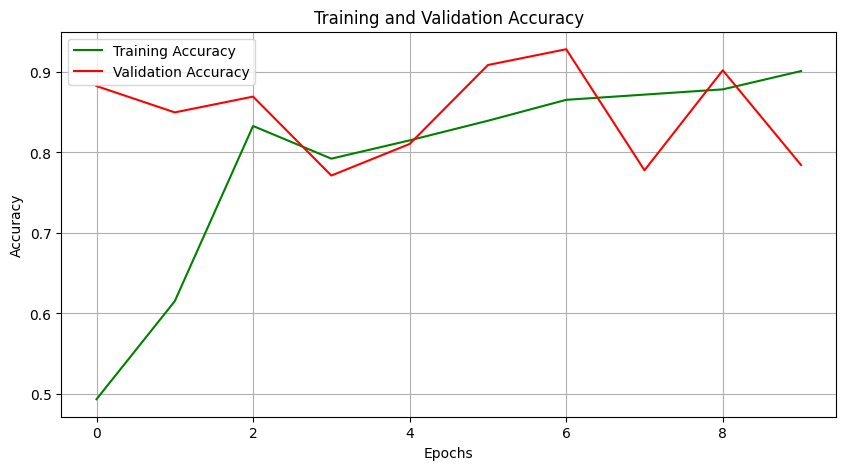

In [18]:
# Plot accuracy
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy', color='Green')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='RED')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


In [15]:
# Print  training accuracy
final_train_accuracy = history.history['accuracy'][-1]  # Last epoch's training accuracy

print(f" Training Accuracy: {final_train_accuracy * 100:.2f}%")


 Training Accuracy: 90.10%


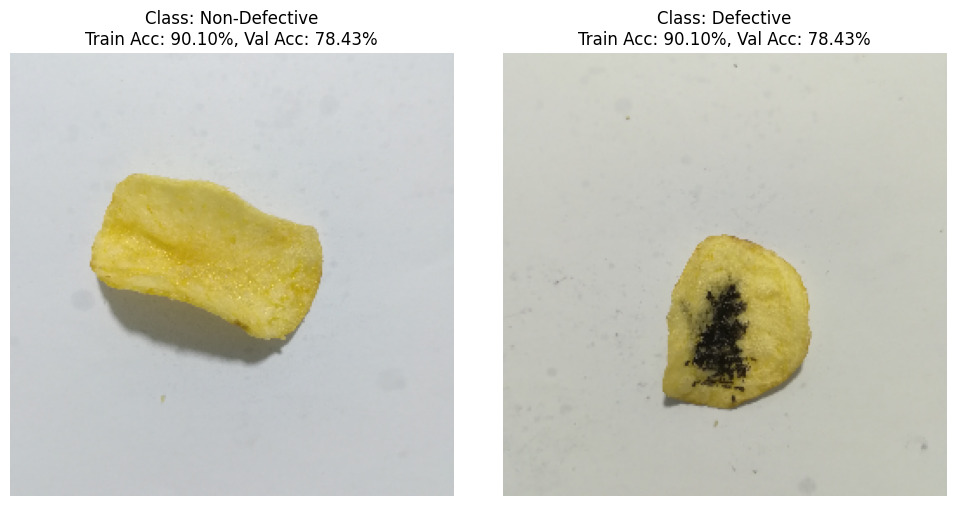

In [26]:
import matplotlib.pyplot as plt
import numpy as np

# Display two sample images from the training dataset with accuracy
def show_two_sample_images_with_accuracy(data_generator, train_accuracy, val_accuracy):
    class_names = list(data_generator.class_indices.keys())
    sample_images, sample_labels = next(data_generator)
    
    # Display only two images
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))
    for img, label, ax in zip(sample_images[:2], sample_labels[:2], axes):
        ax.imshow(img)
        ax.set_title(f"Class: {class_names[int(label)]}\nTrain Acc: {train_accuracy:.2f}%, Val Acc: {val_accuracy:.2f}%")
        ax.axis('off')
    plt.tight_layout()
    plt.show()

# Get the final accuracy values
final_train_accuracy = history.history['accuracy'][-1] * 100  # Last epoch's training accuracy
final_val_accuracy = history.history['val_accuracy'][-1] * 100  # Last epoch's validation accuracy

# Show two sample images with class and accuracy
show_two_sample_images_with_accuracy(train_data, final_train_accuracy, final_val_accuracy)
